# Exoplanets In My Solar System

### This notebook is based on the November 2019 transit of Mercury.

Planetary transits in the solar system are perfect analogies of explanetary transits. If sufficiently intelligent aliens were monitoring the brightness of our star on Monday 11th November 2019, they may have detected something strange.

![caption](files/transit_white.png)

The above image is a simplified diagram of how planetary transits can be detected by measuring the dip in brightness of the host star, known as the "Transit Method". Below is an image I captured of the transit on the 11th. Note the tiny black dot. Thats Mercury!

![caption](files/my_mercury.jpg)

The change in brightness $\Delta F$ is related to the size of the planet $R_P$ through a very simple formula.

$\Delta F / F = (R_P/R_*)^2$

Lets now import some `python` libraries and get `Juypter` to do the calculation for us.

In [1]:
import astropy.units as u
F = 1370 # Stellar Flux
R_p = 2.53E6 # Radius of Mercury in m
R_s = 6.95E8 # Radius of the Sun in m

F"The radius of Mercury is {R_p}, and the radius of the Sun is {R_s}"

'The radius of Mercury is 2530000.0, and the radius of the Sun is 695000000.0'

In [2]:
delta_f_f = ((R_p/R_s)**2)
F"The drop in flux due to the transit of Mercury is {delta_f_f}"

'The drop in flux due to the transit of Mercury is 1.3251695046840224e-05'

Using the [BATMAN](https://www.cfa.harvard.edu/~lkreidberg/batman/index.html) python code, it is possible to simulate what the Mercury transit lightcurve would look like observer from a large distance.

In [3]:
import batman
import numpy as np
import matplotlib.pyplot as plt

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 88.                     #orbital period
params.rp = R_p/R_s                  #planet radius (in units of stellar radii)
params.a = 5.7E7/R_s                 #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-30, 30, 100)

m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()

The purpose of code is to make life easier. In the sections above, I have defined the variables `R_s` and `R_p` but going forward I want to be able to convert planet radii in meters to solar radii easily, so I will create a small subroutine to do this.

In [4]:
def cvnt_sol(radius):
    rad_sol = radius/R_s
    return rad_sol   

In [5]:
example = cvnt_sol(6.05E6)
F"In this example I have converted the radius of Venus into solar radii. The result is {example}"

'In this example I have converted the radius of Venus into solar radii. The result is 0.008705035971223022'

Lets now use `PANDAS` to do some data manipulation.

In [6]:
import pandas as pd # Import the PANDAS library

In [7]:
file = "solar_system_data_1.csv" # Assign the data file to a variable.

In [8]:
df = pd.read_csv(file) # Read in the data file into a dataframe.

In [9]:
df # Display the dataframe.

,Planet,Mass(10^24kg),Radius(km),Diameter(km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,MERCURY,0.3300,2439.5,4879,5427,3.7,4.3,1407.6,4222.6,57.900,...,88,47.4,7.0,0.205,0.034,167,0,0,No,Yes
1,VENUS,4.8700,6052.0,"12,104",5243,8.9,10.4,-5832.5,2802.0,108.200,...,224.7,35.0,3.4,0.007,177.400,464,92,0,No,No
2,EARTH,5.9700,6378.0,"12,756",5514,9.8,11.2,23.9,24.0,149.600,...,365.2,29.8,0.0,0.017,23.400,15,1,1,No,Yes
3,MOON,0.0730,1737.5,3475,3340,1.6,2.4,655.7,708.7,0.384,...,27.3,1.0,5.1,0.055,6.700,-20,0,0,No,No
4,MARS,0.6420,3396.0,6792,3933,3.7,5.0,24.6,24.7,227.900,...,687,24.1,1.9,0.094,25.200,-65,0.01,2,No,No
5,JUPITER,1898.0000,71492.0,"142,984",1326,23.1,59.5,9.9,9.9,778.600,...,4331,13.1,1.3,0.049,3.100,-110,Unknown,79,Yes,Yes
6,SATURN,568.0000,60268.0,"120,536",687,9.0,35.5,10.7,10.7,1433.500,...,"10,747",9.7,2.5,0.057,26.700,-140,Unknown,82,Yes,Yes
7,URANUS,86.8000,25559.0,"51,118",1271,8.7,21.3,-17.2,17.2,2872.500,...,"30,589",6.8,0.8,0.046,97.800,-195,Unknown,27,Yes,Yes
8,NEPTUNE,102.0000,24764.0,"49,528",1638,11.0,23.5,16.1,16.1,4495.100,...,"59,800",5.4,1.8,0.011,28.300,-200,Unknown,14,Yes,Yes
9,PLUTO,0.0146,1185.0,2370,2095,0.7,1.3,-153.3,153.3,5906.400,...,"90,560",4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown


In [10]:
# Convert the Mass from units of 10^24kg to kg.
def to_24(mass):
    mass_24 = mass * 1E24
    return mass_24

In [11]:
df["Mass"] = df["Mass(10^24kg)"].apply(to_24)
df

,Planet,Mass(10^24kg),Radius(km),Diameter(km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),...,Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Mass
0,MERCURY,0.3300,2439.5,4879,5427,3.7,4.3,1407.6,4222.6,57.900,...,47.4,7.0,0.205,0.034,167,0,0,No,Yes,3.300000e+23
1,VENUS,4.8700,6052.0,"12,104",5243,8.9,10.4,-5832.5,2802.0,108.200,...,35.0,3.4,0.007,177.400,464,92,0,No,No,4.870000e+24
2,EARTH,5.9700,6378.0,"12,756",5514,9.8,11.2,23.9,24.0,149.600,...,29.8,0.0,0.017,23.400,15,1,1,No,Yes,5.970000e+24
3,MOON,0.0730,1737.5,3475,3340,1.6,2.4,655.7,708.7,0.384,...,1.0,5.1,0.055,6.700,-20,0,0,No,No,7.300000e+22
4,MARS,0.6420,3396.0,6792,3933,3.7,5.0,24.6,24.7,227.900,...,24.1,1.9,0.094,25.200,-65,0.01,2,No,No,6.420000e+23
5,JUPITER,1898.0000,71492.0,"142,984",1326,23.1,59.5,9.9,9.9,778.600,...,13.1,1.3,0.049,3.100,-110,Unknown,79,Yes,Yes,1.898000e+27
6,SATURN,568.0000,60268.0,"120,536",687,9.0,35.5,10.7,10.7,1433.500,...,9.7,2.5,0.057,26.700,-140,Unknown,82,Yes,Yes,5.680000e+26
7,URANUS,86.8000,25559.0,"51,118",1271,8.7,21.3,-17.2,17.2,2872.500,...,6.8,0.8,0.046,97.800,-195,Unknown,27,Yes,Yes,8.680000e+25
8,NEPTUNE,102.0000,24764.0,"49,528",1638,11.0,23.5,16.1,16.1,4495.100,...,5.4,1.8,0.011,28.300,-200,Unknown,14,Yes,Yes,1.020000e+26
9,PLUTO,0.0146,1185.0,2370,2095,0.7,1.3,-153.3,153.3,5906.400,...,4.7,17.2,0.244,122.500,-225,0.00001,5,No,Unknown,1.460000e+22


In [12]:
# Define a function to calculate the Planet - Star Radius Ratio
def RR(x):
    RR = (x / R_s)
    return RR

In [13]:
df["Radius Ratio"] = df["Radius(km)"].apply(RR)
df

,Planet,Mass(10^24kg),Radius(km),Diameter(km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),...,Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Mass,Radius Ratio
0,MERCURY,0.3300,2439.5,4879,5427,3.7,4.3,1407.6,4222.6,57.900,...,7.0,0.205,0.034,167,0,0,No,Yes,3.300000e+23,0.000004
1,VENUS,4.8700,6052.0,"12,104",5243,8.9,10.4,-5832.5,2802.0,108.200,...,3.4,0.007,177.400,464,92,0,No,No,4.870000e+24,0.000009
2,EARTH,5.9700,6378.0,"12,756",5514,9.8,11.2,23.9,24.0,149.600,...,0.0,0.017,23.400,15,1,1,No,Yes,5.970000e+24,0.000009
3,MOON,0.0730,1737.5,3475,3340,1.6,2.4,655.7,708.7,0.384,...,5.1,0.055,6.700,-20,0,0,No,No,7.300000e+22,0.000003
4,MARS,0.6420,3396.0,6792,3933,3.7,5.0,24.6,24.7,227.900,...,1.9,0.094,25.200,-65,0.01,2,No,No,6.420000e+23,0.000005
5,JUPITER,1898.0000,71492.0,"142,984",1326,23.1,59.5,9.9,9.9,778.600,...,1.3,0.049,3.100,-110,Unknown,79,Yes,Yes,1.898000e+27,0.000103
6,SATURN,568.0000,60268.0,"120,536",687,9.0,35.5,10.7,10.7,1433.500,...,2.5,0.057,26.700,-140,Unknown,82,Yes,Yes,5.680000e+26,0.000087
7,URANUS,86.8000,25559.0,"51,118",1271,8.7,21.3,-17.2,17.2,2872.500,...,0.8,0.046,97.800,-195,Unknown,27,Yes,Yes,8.680000e+25,0.000037
8,NEPTUNE,102.0000,24764.0,"49,528",1638,11.0,23.5,16.1,16.1,4495.100,...,1.8,0.011,28.300,-200,Unknown,14,Yes,Yes,1.020000e+26,0.000036
9,PLUTO,0.0146,1185.0,2370,2095,0.7,1.3,-153.3,153.3,5906.400,...,17.2,0.244,122.500,-225,0.00001,5,No,Unknown,1.460000e+22,0.000002


In [14]:
def cvnt_m(km):
    m = km * 1000
    return m


In [15]:
df["Radius (m)"] = df["Radius(km)"].apply(cvnt_m)
df

,Planet,Mass(10^24kg),Radius(km),Diameter(km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),...,Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?,Mass,Radius Ratio,Radius (m)
0,MERCURY,0.3300,2439.5,4879,5427,3.7,4.3,1407.6,4222.6,57.900,...,0.205,0.034,167,0,0,No,Yes,3.300000e+23,0.000004,2439500.0
1,VENUS,4.8700,6052.0,"12,104",5243,8.9,10.4,-5832.5,2802.0,108.200,...,0.007,177.400,464,92,0,No,No,4.870000e+24,0.000009,6052000.0
2,EARTH,5.9700,6378.0,"12,756",5514,9.8,11.2,23.9,24.0,149.600,...,0.017,23.400,15,1,1,No,Yes,5.970000e+24,0.000009,6378000.0
3,MOON,0.0730,1737.5,3475,3340,1.6,2.4,655.7,708.7,0.384,...,0.055,6.700,-20,0,0,No,No,7.300000e+22,0.000003,1737500.0
4,MARS,0.6420,3396.0,6792,3933,3.7,5.0,24.6,24.7,227.900,...,0.094,25.200,-65,0.01,2,No,No,6.420000e+23,0.000005,3396000.0
5,JUPITER,1898.0000,71492.0,"142,984",1326,23.1,59.5,9.9,9.9,778.600,...,0.049,3.100,-110,Unknown,79,Yes,Yes,1.898000e+27,0.000103,71492000.0
6,SATURN,568.0000,60268.0,"120,536",687,9.0,35.5,10.7,10.7,1433.500,...,0.057,26.700,-140,Unknown,82,Yes,Yes,5.680000e+26,0.000087,60268000.0
7,URANUS,86.8000,25559.0,"51,118",1271,8.7,21.3,-17.2,17.2,2872.500,...,0.046,97.800,-195,Unknown,27,Yes,Yes,8.680000e+25,0.000037,25559000.0
8,NEPTUNE,102.0000,24764.0,"49,528",1638,11.0,23.5,16.1,16.1,4495.100,...,0.011,28.300,-200,Unknown,14,Yes,Yes,1.020000e+26,0.000036,24764000.0
9,PLUTO,0.0146,1185.0,2370,2095,0.7,1.3,-153.3,153.3,5906.400,...,0.244,122.500,-225,0.00001,5,No,Unknown,1.460000e+22,0.000002,1185000.0


We'll take our data, and extract only the columns we're interested in, storing them in a new dataframe which we will call `df2`

In [16]:
cols = ['Planet','Mass','Radius (m)']
df2 = df[cols]
df2

,Planet,Mass,Radius (m)
0,MERCURY,3.300000e+23,2439500.0
1,VENUS,4.870000e+24,6052000.0
2,EARTH,5.970000e+24,6378000.0
3,MOON,7.300000e+22,1737500.0
4,MARS,6.420000e+23,3396000.0
5,JUPITER,1.898000e+27,71492000.0
6,SATURN,5.680000e+26,60268000.0
7,URANUS,8.680000e+25,25559000.0
8,NEPTUNE,1.020000e+26,24764000.0
9,PLUTO,1.460000e+22,1185000.0


Lets now create another subroutine which will take the `Radius (m)` column from the `df2` dataframe, and calculate the delta flux

In [17]:
def flux(Radius):
    flux = (Radius)**2 / (R_s **2)
    return flux

In [18]:
df2["Delta Flux"] = df2["Radius (m)"].apply(flux)
#dft = df2.drop(columns="Flux")

C:\Users\mwood\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
cols = ['Planet','Mass','Radius (m)','Delta Flux']
data = df2[cols]
data

,Planet,Mass,Radius (m),Delta Flux
0,MERCURY,3.300000e+23,2439500.0,0.000012
1,VENUS,4.870000e+24,6052000.0,0.000076
2,EARTH,5.970000e+24,6378000.0,0.000084
3,MOON,7.300000e+22,1737500.0,0.000006
4,MARS,6.420000e+23,3396000.0,0.000024
5,JUPITER,1.898000e+27,71492000.0,0.010581
6,SATURN,5.680000e+26,60268000.0,0.007520
7,URANUS,8.680000e+25,25559000.0,0.001352
8,NEPTUNE,1.020000e+26,24764000.0,0.001270
9,PLUTO,1.460000e+22,1185000.0,0.000003


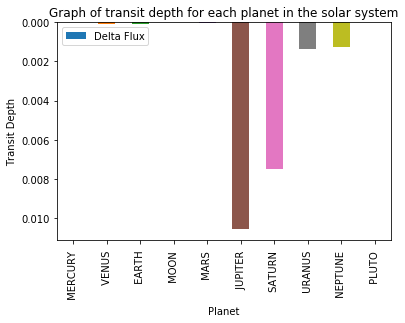

In [20]:
data.plot(kind='bar',x='Planet',y='Delta Flux')
plt.title("Graph of transit depth for each planet in the solar system")
plt.xlabel("Planet")
plt.ylabel("Transit Depth")
plt.gca().invert_yaxis()
plt.show()


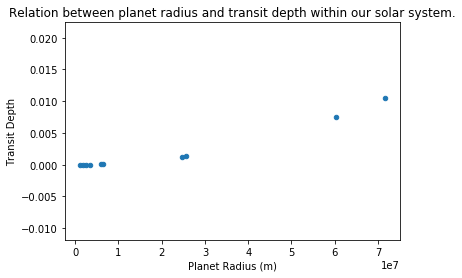

In [21]:
data.plot(kind = 'scatter',y='Delta Flux', x='Radius (m)')
#plt.gca().invert_yaxis()
plt.title("Relation between planet radius and transit depth within our solar system.")
plt.xlabel("Planet Radius (m)")
plt.ylabel("Transit Depth")

plt.show()


Text(0.5,1,'Mass-Period Relation (Solar System)')

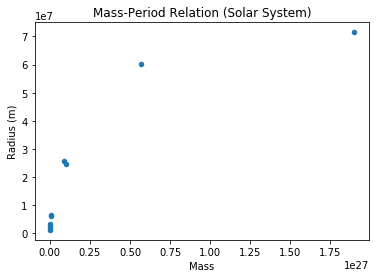

In [28]:
data.plot(kind = 'scatter',x = "Mass",y = "Radius (m)")
plt.title("Mass-Period Relation (Solar System)")
